In [21]:
# ! pip uninstall AIEM -y

Found existing installation: AIEM 2024.8
Uninstalling AIEM-2024.8:
  Successfully uninstalled AIEM-2024.8


In [2]:
! pip install git+https://github.com/Morteza-Khazaei/AIEM.git

  Cloning https://github.com/Morteza-Khazaei/AIEM.git to /tmp/pip-req-build-jqi37tx2
  Running command git clone --filter=blob:none --quiet https://github.com/Morteza-Khazaei/AIEM.git /tmp/pip-req-build-jqi37tx2
  Resolved https://github.com/Morteza-Khazaei/AIEM.git to commit 17b1fa4c84aef467b66cba0d5544bfe7cbc5097a
  Preparing metadata (setup.py) ... done
  Created wheel for AIEM: filename=AIEM-2024.8-py3-none-any.whl size=7103 sha256=f45af137ec376ab7f9cb6771bf8481ce7770e1d373f8929978458d9208c272a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnbfm52c/wheels/45/9a/b3/c75f20518fc5afdbfb17d3c126bfc2384c79eca4e01d9232e2
Successfully built AIEM


In [20]:
from aiem import AIEM
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

freq:  5.405
phi_i:  0.0
phi_s:  179.9999
sigma:  0.00354
cl:  0.0178
eps:  [12.+1.8j]


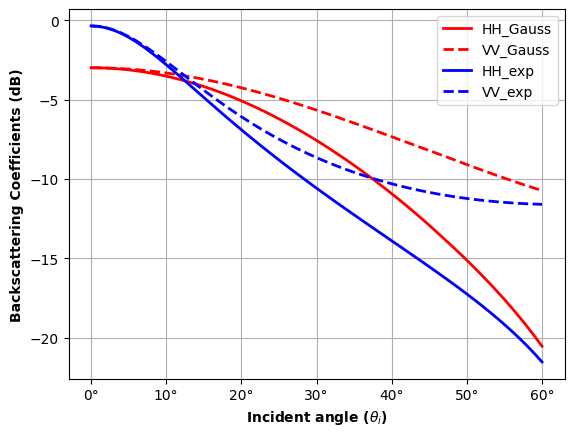

In [57]:
frq = 5.405
print('freq: ', frq)
itype = ['1', '2']
theta_i = np.arange(0.00001, 61, 1)
# print('theta: ', theta)
phi_i = 0.0
print('phi_i: ', phi_i)
phi_s = 179.9999
print('phi_s: ', phi_s)
sigma = 0.00354
print('sigma: ', sigma)
cl = 0.0178
print('cl: ', cl)
err = 12
eri = 1.8
eps = np.array([err+eri*1j,], dtype=complex)
print('eps: ', eps)

# Initialize defaultdicts to store the results
HH = defaultdict(list)
VV = defaultdict(list)
HV = defaultdict(list)
VH = defaultdict(list)

# Loop over itype and theta_i values
for n in itype:
    for i in theta_i:
        aiem = AIEM(frq_ghz=frq, theta_i=i, theta_s=i, phi_i=phi_i, phi_s=phi_s, sigma=sigma, cl=cl, eps=eps, itype=n)
        sigHH, sigVH, sigHV, sigVV = aiem.run()
        HH[n].append(sigHH)
        VV[n].append(sigVV)
        HV[n].append(sigHV)
        VH[n].append(sigVH)

# # Plotting results
# plt.figure(1)

# # Plotting HH and VV for each itype
plt.plot(theta_i, HH['1'], color='r', linewidth=2, label='HH_Gauss')
plt.plot(theta_i, VV['1'], color='r', linewidth=2, linestyle='--', label='VV_Gauss')
plt.plot(theta_i, HH['2'], color='b', linewidth=2, label='HH_exp')
plt.plot(theta_i, VV['2'], color='b', linestyle='--', linewidth=2, label='VV_exp')

# Customizing plot appearance
plt.grid(True)

plt.xticks(ticks=np.arange(0, 61, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°'])
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=10, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=10, fontweight='bold')
plt.legend(fontsize=10)
plt.show()

10000 64 64
theta:  [ 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80]
phi:  [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180]
sigma:  0.001
cl:  [0.001 0.006 0.011 0.016 0.021 0.026 0.031 0.036 0.041 0.046 0.051 0.056
 0.061 0.066 0.071 0.076 0.081 0.086 0.091 0.096]
115200
7265
79204


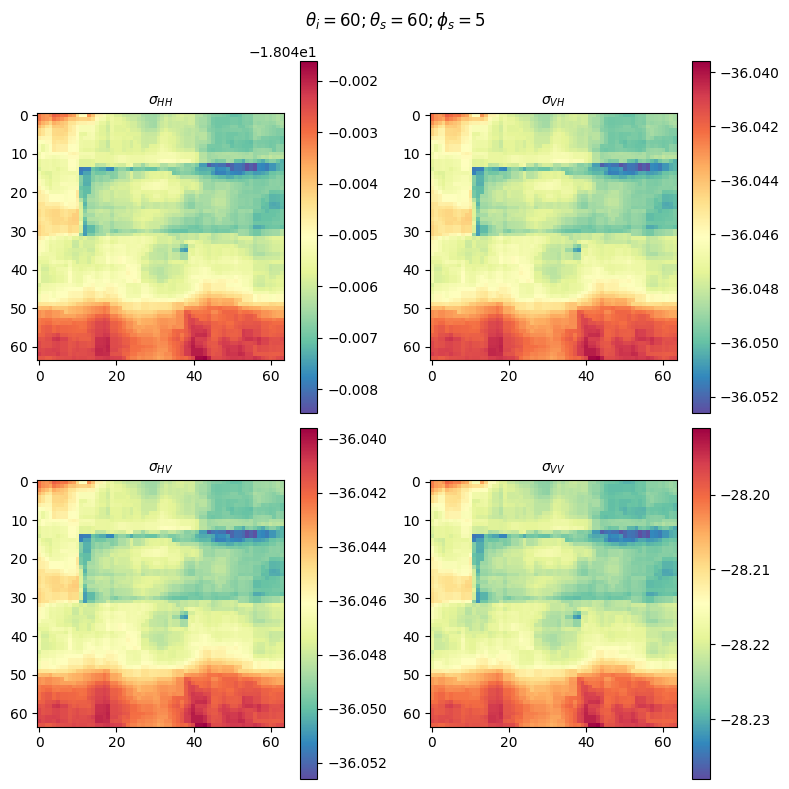

In [2]:
import os
import random
import itertools
from aiem import AIEM
import numpy as np
import matplotlib.pyplot as plt



fname = r'LC08_032032_20220912_eps_5.3GHz'
base_path = r'/mnt/d/PhD source code/datasets/'
input_path = os.path.join(base_path, 'outputs')
# output_path = os.path.join(base_path, 'outputs')
infile = os.path.join(input_path, fname + '.npz')
# outfile = os.path.join(output_path, oname + '.npz')

# Load Array
dictData = np.load(infile)
stack = dictData['arr_0']

# Print the array
nsize, xsize, ysize = stack.shape
print(nsize, xsize, ysize)


frq = 5.3
itype = ['2',]
theta = np.arange(5, 85, 5)
print('theta: ', theta)
phi = np.arange(5, 185, 5)
print('phi: ', phi)
sigma = np.arange(0.001, 0.05, 0.005)
print('sigma: ', sigma[0])
cl = np.arange(0.001, 0.1, 0.005)
print('cl: ', cl)

# to compute all possible permutations
permutation = list(itertools.product(*[theta, phi, sigma, cl]))
print(len(permutation))

bnames = ['HH', 'VH', 'HV', 'VV']
id_eps = random.randint(0, nsize)
print(id_eps)
id_per = random.randint(0, len(permutation))
print(id_per)

er = stack[id_eps]
p = permutation[id_per]
sig = AIEM(frq_ghz=frq, theta_i=p[0], theta_s=p[0], phi_i=0, phi_s=p[1], sigma=p[2], cl=p[3], eps=er, itype='2').run()

# Plot the SOM band
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axs.ravel()):
    im = ax.imshow(sig[i], cmap='Spectral_r')
    ax.set_title(rf'$\sigma_{{{bnames[i]}}}$', fontsize=10)
    fig.colorbar(im, ax=ax)

fig.suptitle(rf'$\theta_i={p[0]}; \theta_s={p[0]}; \phi_s={p[1]}$')
fig.tight_layout()
plt.show()